In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

###  Data exploration

In [3]:
web = pd.read_excel('web_user_traffic_data.xlsx')
web.head()

,Orderid,Orderdatetime,Saleamount,Newcustomer,Position,Positiondatetime,Groupname,Networkname,Networkid,Brand,Positionname,Orderdatetime.1,Positiontime,Time to Convert (Days)
0,11634052,2012-05-01 04:24:00,341.5,Y,1,2012-05-01 03:49:00,BUZZ AFFILIATE,Buzz CPA Affiliate,buzz23,N,CONVERTER,2012-05-01 04:24:00,2012-05-01 03:49:00,0
1,11634052,2012-05-01 04:24:00,341.5,Y,0,2012-05-01 03:47:00,SEARCH GOOGLE BRAND,G: Medifast Brand Terms > Medifast >,g000793,Y,ORIGINATOR,2012-05-01 04:24:00,2012-05-01 03:47:00,0
2,11634059,2012-05-01 04:08:00,339.0,Y,2,2012-04-29 21:01:00,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,CONVERTER,2012-05-01 04:08:00,2012-04-29 21:01:00,2
3,11634059,2012-05-01 04:08:00,339.0,Y,1,2012-04-24 05:29:00,CPM,Armonix,nar7467,N,ASSIST,2012-05-01 04:08:00,2012-04-24 05:29:00,7
4,11634059,2012-05-01 04:08:00,339.0,Y,0,2012-04-23 02:46:00,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,ORIGINATOR,2012-05-01 04:08:00,2012-04-23 02:46:00,8


In [4]:
web.describe()
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10119 entries, 0 to 10118
Data columns (total 14 columns):
Orderid                   10119 non-null int64
Orderdatetime             10119 non-null datetime64[ns]
Saleamount                10119 non-null float64
Newcustomer               10119 non-null object
Position                  10119 non-null int64
Positiondatetime          10119 non-null datetime64[ns]
Groupname                 10119 non-null object
Networkname               10119 non-null object
Networkid                 10119 non-null object
Brand                     10040 non-null object
Positionname              10119 non-null object
Orderdatetime.1           10119 non-null datetime64[ns]
Positiontime              10119 non-null datetime64[ns]
Time to Convert (Days)    10119 non-null int64
dtypes: datetime64[ns](4), float64(1), int64(3), object(6)
memory usage: 1.1+ MB


In [5]:
web.groupby('Groupname')['Positionname'].count()

Groupname
BUZZ AFFILIATE             1809
CJ                          708
CPM                        5903
DIRECT MAIL                   1
OTHER                        46
PRINT - MAGAZINES            15
SEARCH GOOGLE BRAND        1082
SEARCH GOOGLE NON-BRAND     136
SEARCH MSN BRAND            238
SEARCH MSN NON-BRAND         18
SEARCH YAHOO BRAND            3
Social                        3
TV                           70
Uncategorized                87
Name: Positionname, dtype: int64

In [6]:
web.groupby('Positionname')['Orderid'].count()

Positionname
ASSIST        1715
CONVERTER     2170
ORIGINATOR    2169
ROSTER        4065
Name: Orderid, dtype: int64

### The overview of Each Channel and the role in the funnel

In [7]:
web['Countnumber'] = 1
stage = web.pivot_table('Countnumber', index = 'Groupname', columns = 'Positionname', aggfunc= 'sum')
stage

Positionname,ASSIST,CONVERTER,ORIGINATOR,ROSTER
Groupname,,,,
BUZZ AFFILIATE,333.0,632.0,287.0,557.0
CJ,127.0,312.0,107.0,162.0
CPM,1070.0,1112.0,812.0,2909.0
DIRECT MAIL,NaN,NaN,1.0,NaN
OTHER,4.0,5.0,24.0,13.0
PRINT - MAGAZINES,2.0,5.0,4.0,4.0
SEARCH GOOGLE BRAND,126.0,NaN,662.0,294.0
SEARCH GOOGLE NON-BRAND,11.0,42.0,65.0,18.0
SEARCH MSN BRAND,17.0,NaN,163.0,58.0


In [8]:
stage2 = stage[stage['ASSIST'] >= 8]
stage2 = stage2.fillna(0)
stage2 = stage2.drop(['Uncategorized'])
stage2

Positionname,ASSIST,CONVERTER,ORIGINATOR,ROSTER
Groupname,,,,
BUZZ AFFILIATE,333.0,632.0,287.0,557.0
CJ,127.0,312.0,107.0,162.0
CPM,1070.0,1112.0,812.0,2909.0
SEARCH GOOGLE BRAND,126.0,0.0,662.0,294.0
SEARCH GOOGLE NON-BRAND,11.0,42.0,65.0,18.0
SEARCH MSN BRAND,17.0,0.0,163.0,58.0
TV,8.0,25.0,20.0,17.0


In [9]:
stage3 = stage2.apply(lambda x: round(x/x.sum(),3), axis = 1)
# reorder the column to match the funnel order
stage4 = stage3.reindex(columns = ['ORIGINATOR','ROSTER','ASSIST','CONVERTER'])
stage4 = stage4.T
stage4

Groupname,BUZZ AFFILIATE,CJ,CPM,SEARCH GOOGLE BRAND,SEARCH GOOGLE NON-BRAND,SEARCH MSN BRAND,TV
Positionname,,,,,,,
ORIGINATOR,0.159,0.151,0.138,0.612,0.478,0.685,0.286
ROSTER,0.308,0.229,0.493,0.272,0.132,0.244,0.243
ASSIST,0.184,0.179,0.181,0.116,0.081,0.071,0.114
CONVERTER,0.349,0.441,0.188,0.000,0.309,0.000,0.357


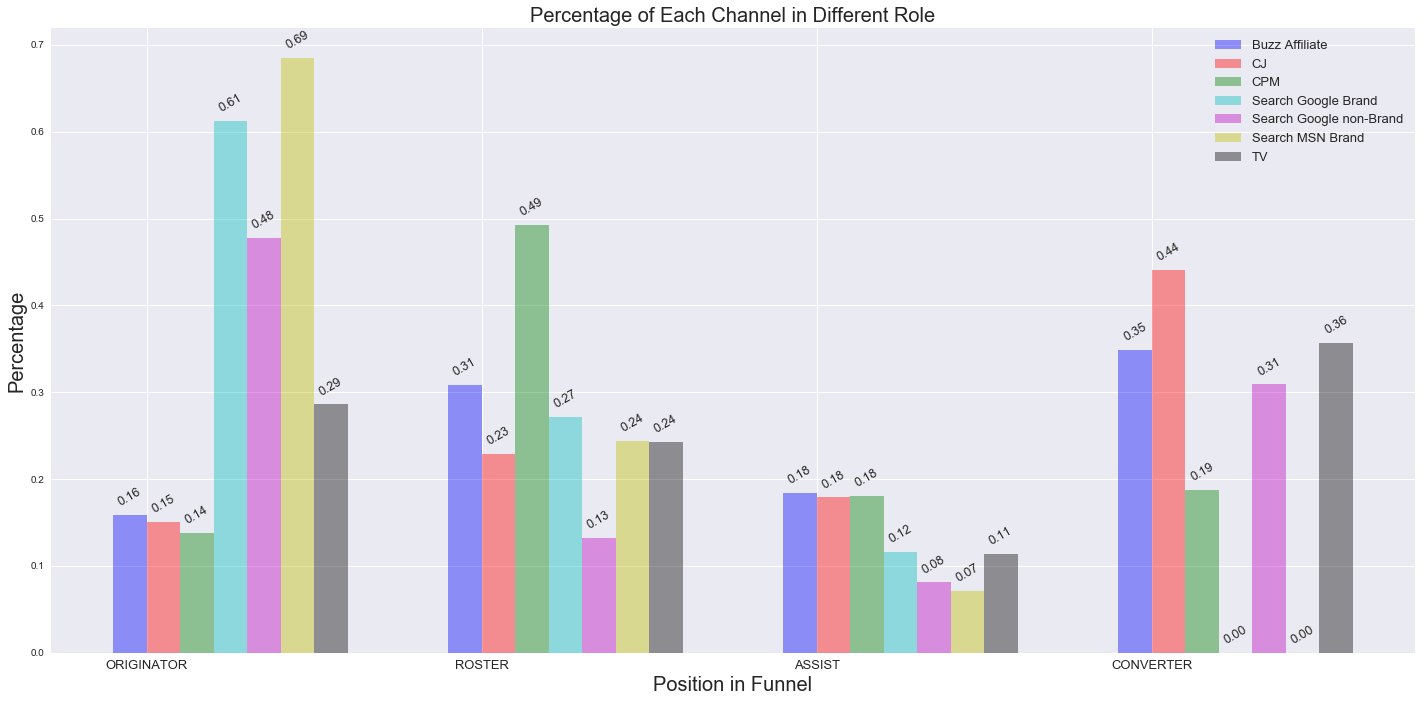

In [10]:
# plot the graph

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=13)

fig, ax = plt.subplots()
index = np.arange(len(stage4.index))
bar_width = 0.1

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, stage4['BUZZ AFFILIATE'], bar_width,
                alpha=opacity, color='b',error_kw=error_config,
                label='Buzz Affiliate')

rects2 = ax.bar(index + bar_width, stage4['CJ'], bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='CJ')

rects3 = ax.bar(index + bar_width*2, stage4['CPM'], bar_width,
                alpha=opacity, color='g', error_kw=error_config,
                label='CPM')

rects4 = ax.bar(index + bar_width*3, stage4['SEARCH GOOGLE BRAND'], bar_width,
                alpha=opacity, color='c', error_kw=error_config,
                label='Search Google Brand')

rects5 = ax.bar(index + bar_width*4, stage4['SEARCH GOOGLE NON-BRAND'], bar_width,
                alpha=opacity, color='m', error_kw=error_config,
                label='Search Google non-Brand')

rects6 = ax.bar(index + bar_width*5, stage4['SEARCH MSN BRAND'], bar_width,
                alpha=opacity, color='y', error_kw=error_config,
                label='Search MSN Brand')

rects7 = ax.bar(index + bar_width*6, stage4['TV'], bar_width,
                alpha=opacity, color='k', error_kw=error_config,
                label='TV')

ax.set_xlabel('Position in Funnel',  fontsize = 20)
ax.set_ylabel('Percentage',  fontsize = 20)
ax.set_title('Percentage of Each Channel in Different Role', fontsize = 20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(stage4.index)
ax.legend(fontsize = 13)


def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%.2f' % height,
                ha='center', va='bottom', rotation = 30, size = 'smaller')

autolabel(rects1, ax)
autolabel(rects2, ax)
autolabel(rects3, ax)
autolabel(rects4, ax)
autolabel(rects5, ax)
autolabel(rects6, ax)
autolabel(rects7, ax)

fig.tight_layout()
plt.show()

### Which Channels is the major originator and which is the major converter?

In [11]:
stage['orig_perc'] = round(stage.ORIGINATOR / stage.ORIGINATOR.sum(), 2)
stage['convert_perc'] = round(stage.CONVERTER / stage.CONVERTER.sum(),2)
stage = stage.fillna(0)
stage

Positionname,ASSIST,CONVERTER,ORIGINATOR,ROSTER,orig_perc,convert_perc
Groupname,,,,,,
BUZZ AFFILIATE,333.0,632.0,287.0,557.0,0.13,0.29
CJ,127.0,312.0,107.0,162.0,0.05,0.14
CPM,1070.0,1112.0,812.0,2909.0,0.37,0.51
DIRECT MAIL,0.0,0.0,1.0,0.0,0.00,0.00
OTHER,4.0,5.0,24.0,13.0,0.01,0.00
PRINT - MAGAZINES,2.0,5.0,4.0,4.0,0.00,0.00
SEARCH GOOGLE BRAND,126.0,0.0,662.0,294.0,0.31,0.00
SEARCH GOOGLE NON-BRAND,11.0,42.0,65.0,18.0,0.03,0.02
SEARCH MSN BRAND,17.0,0.0,163.0,58.0,0.08,0.00


In [12]:
stage.index

Index(['BUZZ AFFILIATE', 'CJ', 'CPM', 'DIRECT MAIL', 'OTHER',
       'PRINT - MAGAZINES', 'SEARCH GOOGLE BRAND', 'SEARCH GOOGLE NON-BRAND',
       'SEARCH MSN BRAND', 'SEARCH MSN NON-BRAND', 'SEARCH YAHOO BRAND',
       'Social', 'TV', 'Uncategorized'],
      dtype='object', name='Groupname')

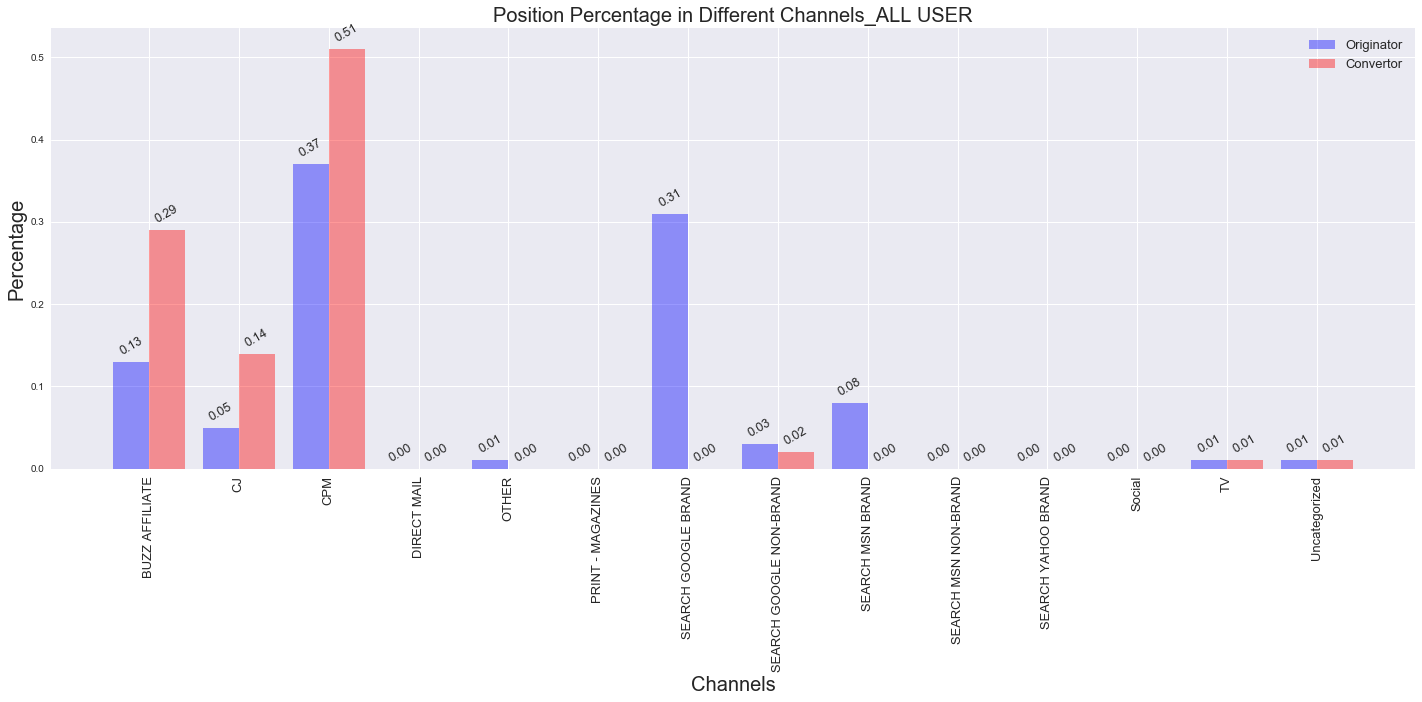

In [13]:
# plot the graph
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=13)

fig, ax = plt.subplots()
index = np.arange(len(stage.index))
bar_width = 0.40

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, stage['orig_perc'], bar_width,
                alpha=opacity, color='b',error_kw=error_config,
                label='Originator')

rects2 = ax.bar(index + bar_width, stage['convert_perc'], bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Convertor')

ax.set_xlabel('Channels',  fontsize = 20)
ax.set_ylabel('Percentage',  fontsize = 20)
ax.set_title('Position Percentage in Different Channels_ALL USER', fontsize = 20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(stage.index, rotation = 90)
ax.legend(fontsize = 13)

autolabel(rects1, ax)
autolabel(rects2, ax)


fig.tight_layout()
plt.show()

### Which Channels is the major originator and which is the major converter? (New Customer)

In [14]:
web_new = web[web['Newcustomer'] == 'Y']
stage_newuser = web_new.pivot_table('Countnumber', index = 'Groupname', columns = 'Positionname', aggfunc= 'sum')
stage_newuser

Positionname,ASSIST,CONVERTER,ORIGINATOR,ROSTER
Groupname,,,,
BUZZ AFFILIATE,223.0,450.0,163.0,340.0
CJ,84.0,220.0,59.0,98.0
CPM,533.0,545.0,486.0,1372.0
OTHER,1.0,2.0,7.0,2.0
PRINT - MAGAZINES,2.0,4.0,2.0,3.0
SEARCH GOOGLE BRAND,82.0,NaN,416.0,127.0
SEARCH GOOGLE NON-BRAND,9.0,32.0,42.0,10.0
SEARCH MSN BRAND,14.0,NaN,93.0,28.0
SEARCH MSN NON-BRAND,1.0,3.0,6.0,2.0


In [15]:
stage_newuser2 = stage_newuser.apply(lambda x: round(x/x.sum(),2))
stage_newuser2 = stage_newuser2.fillna(0)
stage_newuser2

Positionname,ASSIST,CONVERTER,ORIGINATOR,ROSTER
Groupname,,,,
BUZZ AFFILIATE,0.23,0.35,0.13,0.17
CJ,0.09,0.17,0.05,0.05
CPM,0.55,0.42,0.38,0.68
OTHER,0.00,0.00,0.01,0.00
PRINT - MAGAZINES,0.00,0.00,0.00,0.00
SEARCH GOOGLE BRAND,0.08,0.00,0.32,0.06
SEARCH GOOGLE NON-BRAND,0.01,0.02,0.03,0.00
SEARCH MSN BRAND,0.01,0.00,0.07,0.01
SEARCH MSN NON-BRAND,0.00,0.00,0.00,0.00


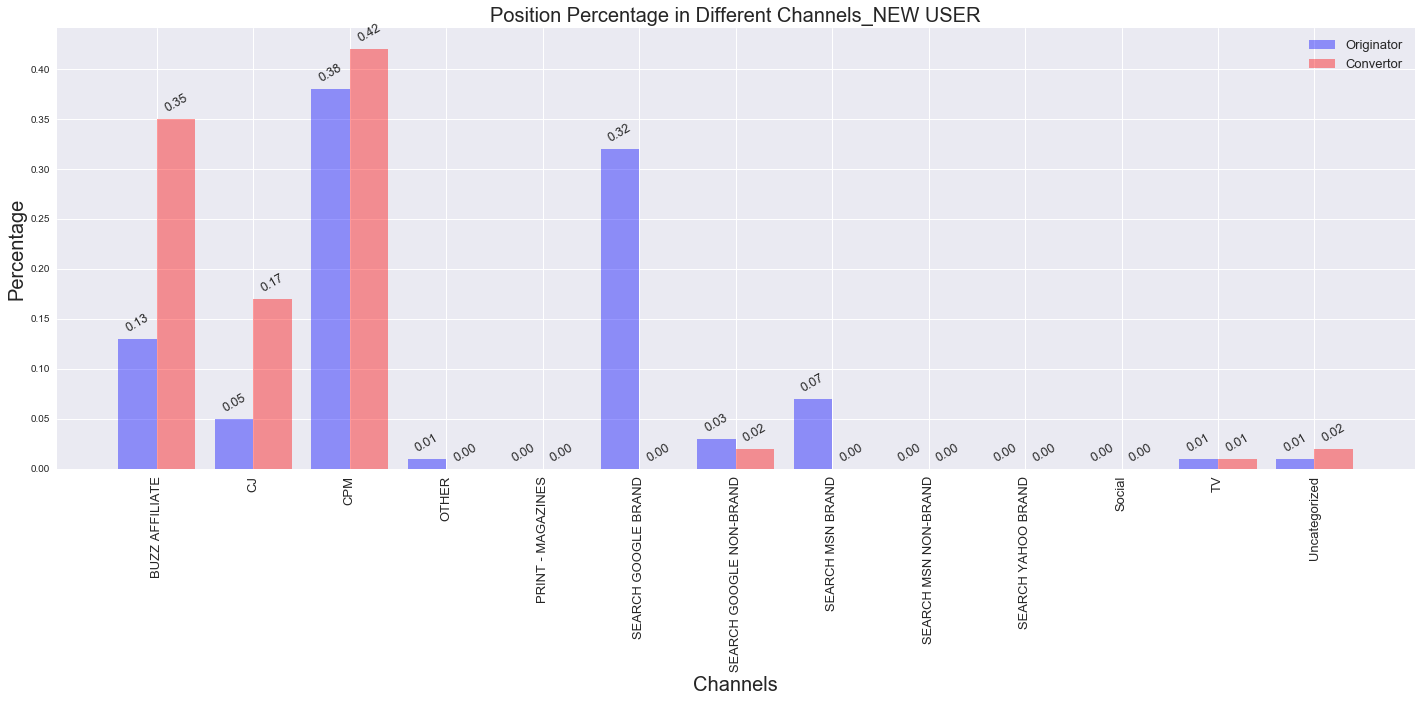

In [16]:
# plot the graph
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=13)

fig, ax = plt.subplots()
index = np.arange(len(stage_newuser2.index))
bar_width = 0.40

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, stage_newuser2['ORIGINATOR'], bar_width,
                alpha=opacity, color='b',error_kw=error_config,
                label='Originator')

rects2 = ax.bar(index + bar_width, stage_newuser2['CONVERTER'], bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Convertor')

ax.set_xlabel('Channels',  fontsize = 20)
ax.set_ylabel('Percentage',  fontsize = 20)
ax.set_title('Position Percentage in Different Channels_NEW USER', fontsize = 20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(stage_newuser2.index, rotation = 90)
ax.legend(fontsize = 13)

autolabel(rects1, ax)
autolabel(rects2, ax)


fig.tight_layout()
plt.show()

### Which Channels is the major originator and which is the major converter? (Old Customer)

In [17]:
web_new = web[web['Newcustomer'] == 'N']
stage_olduser = web_new.pivot_table('Countnumber', index = 'Groupname', columns = 'Positionname', aggfunc= 'sum')
stage_olduser

Positionname,ASSIST,CONVERTER,ORIGINATOR,ROSTER
Groupname,,,,
BUZZ AFFILIATE,110.0,182.0,124.0,217.0
CJ,43.0,92.0,48.0,64.0
CPM,537.0,567.0,326.0,1537.0
DIRECT MAIL,NaN,NaN,1.0,NaN
OTHER,3.0,3.0,17.0,11.0
PRINT - MAGAZINES,NaN,1.0,2.0,1.0
SEARCH GOOGLE BRAND,44.0,NaN,246.0,167.0
SEARCH GOOGLE NON-BRAND,2.0,10.0,23.0,8.0
SEARCH MSN BRAND,3.0,NaN,70.0,30.0


In [18]:
stage_olduser2 = stage_olduser.apply(lambda x: round(x/x.sum(),2))
stage_olduser2 = stage_olduser2.fillna(0)
stage_olduser2

Positionname,ASSIST,CONVERTER,ORIGINATOR,ROSTER
Groupname,,,,
BUZZ AFFILIATE,0.15,0.21,0.14,0.11
CJ,0.06,0.11,0.05,0.03
CPM,0.72,0.65,0.37,0.75
DIRECT MAIL,0.00,0.00,0.00,0.00
OTHER,0.00,0.00,0.02,0.01
PRINT - MAGAZINES,0.00,0.00,0.00,0.00
SEARCH GOOGLE BRAND,0.06,0.00,0.28,0.08
SEARCH GOOGLE NON-BRAND,0.00,0.01,0.03,0.00
SEARCH MSN BRAND,0.00,0.00,0.08,0.01


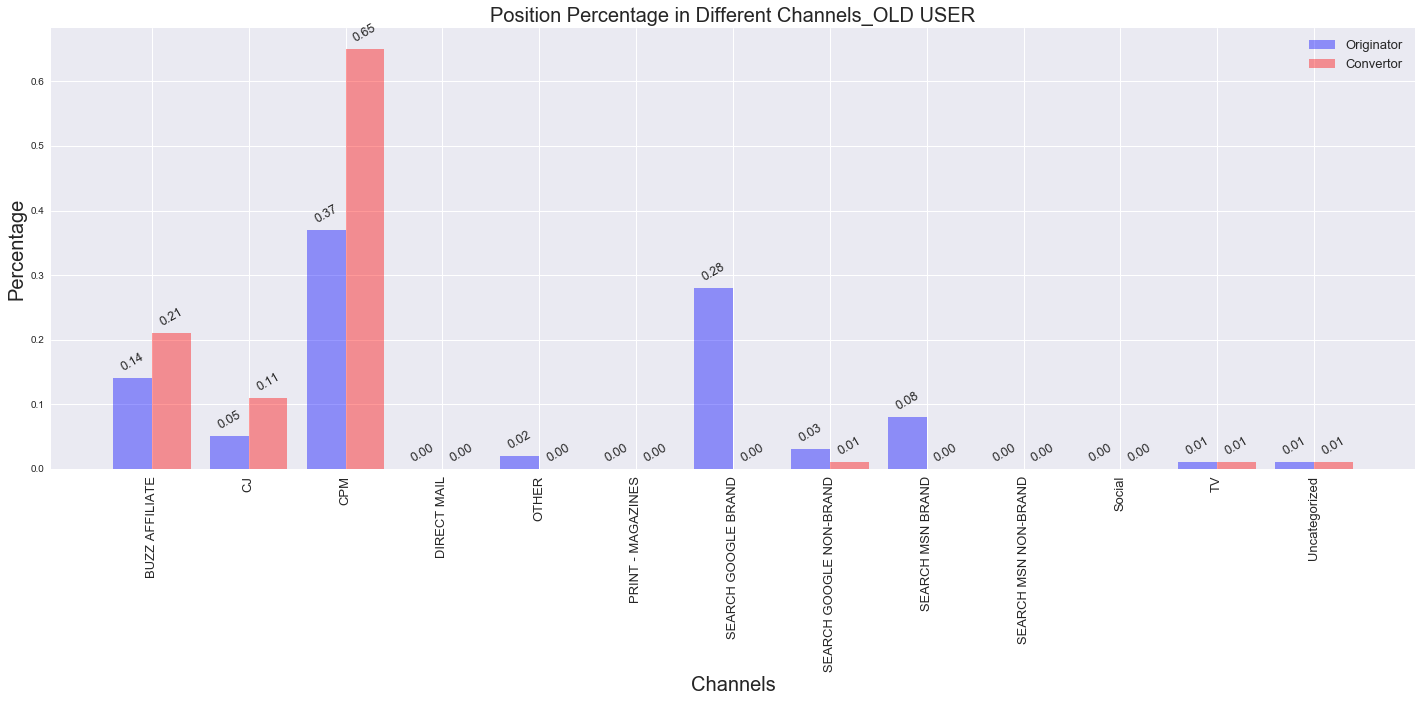

In [19]:
#plot the graph
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=13)

fig, ax = plt.subplots()
index = np.arange(len(stage_olduser2.index))
bar_width = 0.40

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, stage_olduser2['ORIGINATOR'], bar_width,
                alpha=opacity, color='b',error_kw=error_config,
                label='Originator')

rects2 = ax.bar(index + bar_width, stage_olduser2['CONVERTER'], bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Convertor')

ax.set_xlabel('Channels',  fontsize = 20)
ax.set_ylabel('Percentage',  fontsize = 20)
ax.set_title('Position Percentage in Different Channels_OLD USER', fontsize = 20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(stage_olduser2.index, rotation = 90)
ax.legend(fontsize = 13)

autolabel(rects1, ax)
autolabel(rects2, ax)


fig.tight_layout()
plt.show()

### New and old customer =>> Their conversion behavior

In [20]:
web_convert = web[web['Positionname']=='CONVERTER']
web_convert.head()

,Orderid,Orderdatetime,Saleamount,Newcustomer,Position,Positiondatetime,Groupname,Networkname,Networkid,Brand,Positionname,Orderdatetime.1,Positiontime,Time to Convert (Days),Countnumber
0,11634052,2012-05-01 04:24:00,341.50,Y,1,2012-05-01 03:49:00,BUZZ AFFILIATE,Buzz CPA Affiliate,buzz23,N,CONVERTER,2012-05-01 04:24:00,2012-05-01 03:49:00,0,1
2,11634059,2012-05-01 04:08:00,339.00,Y,2,2012-04-29 21:01:00,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,CONVERTER,2012-05-01 04:08:00,2012-04-29 21:01:00,2,1
5,11634060,2012-05-01 04:04:00,101.79,N,7,2012-04-29 23:06:00,CPM,Adroll - adr,adr,N,CONVERTER,2012-05-01 04:04:00,2012-04-29 23:06:00,2,1
13,11634119,2012-05-01 04:39:00,174.69,N,1,2012-05-01 04:17:00,CPM,Acerno,acerno,N,CONVERTER,2012-05-01 04:39:00,2012-05-01 04:17:00,0,1
15,11634137,2012-05-01 04:48:00,277.50,N,7,2012-02-24 02:26:00,CPM,Mediawhiz,n62974792,N,CONVERTER,2012-05-01 04:48:00,2012-02-24 02:26:00,67,1


In [21]:
convert_newold = web_convert.pivot_table('Countnumber', index = 'Position', columns = 'Newcustomer', aggfunc= 'sum')
convert_newold

Newcustomer,N,Y
Position,,
1,126,329
2,118,252
3,167,233
4,116,142
5,90,117
6,59,86
7,87,56
8,62,48
9,49,33


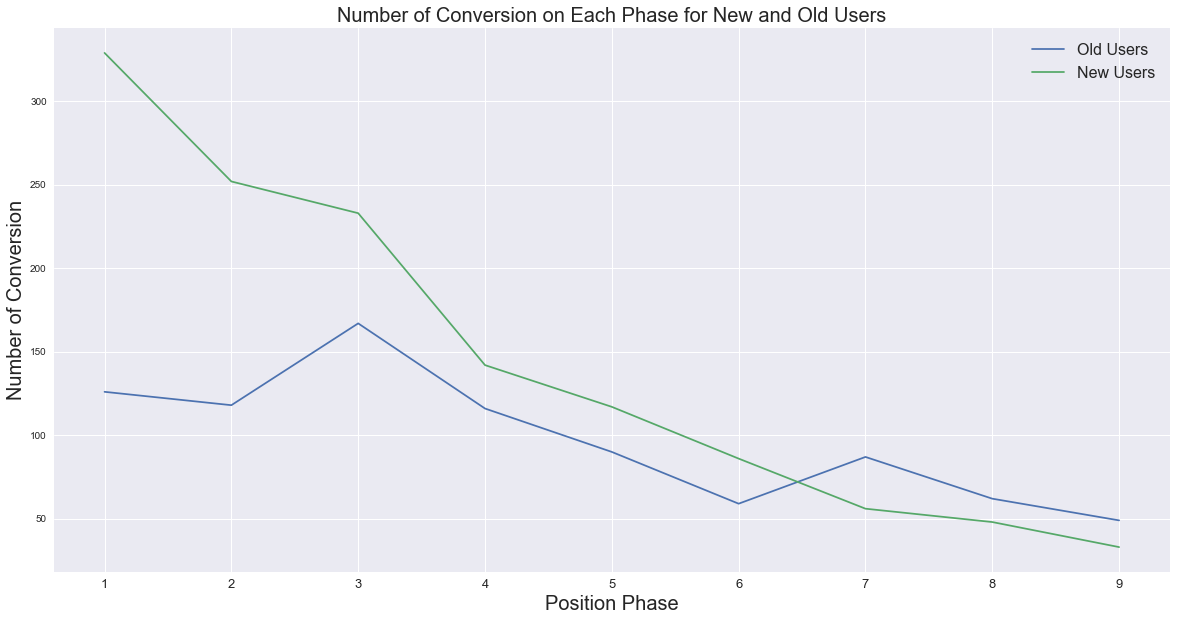

In [22]:
plt.plot(convert_newold['N'], label = 'Old Users')
plt.plot(convert_newold['Y'], label = 'New Users')


plt.xlabel('Position Phase',  fontsize = 20)
plt.ylabel('Number of Conversion',  fontsize = 20)
plt.title('Number of Conversion on Each Phase for New and Old Users', fontsize = 20)
plt.legend(fontsize = 16)

plt.show()

### For ORIGINATOR channel, how many orders do they bring and how valuable for each channel

In [23]:
web_origin = web[web['Positionname']=='ORIGINATOR']

In [24]:
df3 = web_origin.groupby('Groupname')['Saleamount'].aggregate({'No_of_Sale':'count','Total_Sum':'sum'})
df3['Avg_Sales'] = round(df3['Total_Sum'] /df3['No_of_Sale'],2)
df3

C:\Users\fengy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,No_of_Sale,Total_Sum,Avg_Sales
Groupname,,,
BUZZ AFFILIATE,287,73024.08,254.44
CJ,107,27125.35,253.51
CPM,812,192255.98,236.77
DIRECT MAIL,1,170.98,170.98
OTHER,24,5555.55,231.48
PRINT - MAGAZINES,4,1051.91,262.98
SEARCH GOOGLE BRAND,662,163228.21,246.57
SEARCH GOOGLE NON-BRAND,65,15438.99,237.52
SEARCH MSN BRAND,163,39030.51,239.45


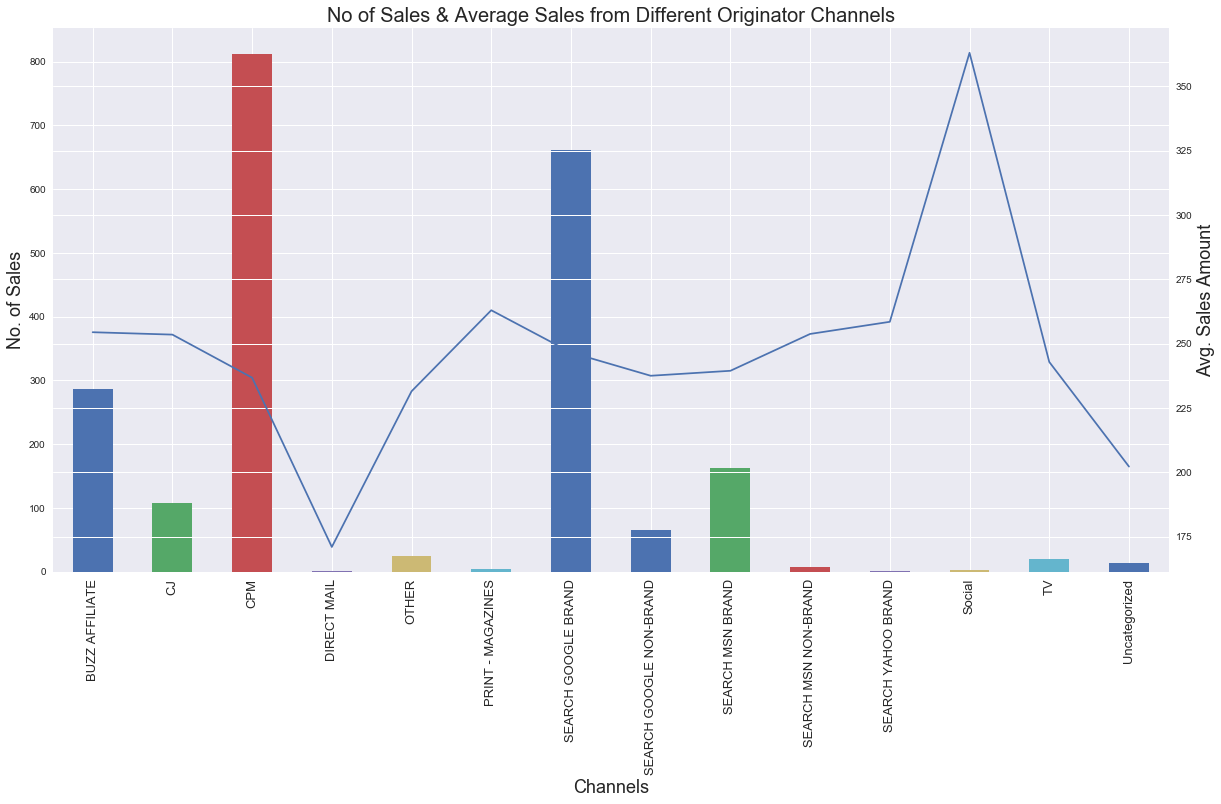

In [25]:
fig = plt.figure()

ax = df3['No_of_Sale'].plot(kind = "bar", use_index = True) 
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df3['Avg_Sales'].values)

ax.set_xlabel('Channels',  fontsize = 18)
ax.set_ylabel('No. of Sales',  fontsize = 18)
ax2.set_ylabel('Avg. Sales Amount', fontsize = 18)
ax.set_title('No of Sales & Average Sales from Different Originator Channels', fontsize = 20)

plt.show()

### For ORIGINATOR channel, how many orders do they bring and how valuable for each channel

In [26]:
web_convert = web[web['Positionname']=='CONVERTER']
df4 = web_convert.groupby('Groupname')['Saleamount'].aggregate({'No_of_Sale':'count','Total_Sum':'sum'})
df4['Avg_Sales'] = round(df4['Total_Sum'] /df4['No_of_Sale'],2)
df4

C:\Users\fengy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,No_of_Sale,Total_Sum,Avg_Sales
Groupname,,,
BUZZ AFFILIATE,632,167351.81,264.80
CJ,312,82669.38,264.97
CPM,1112,250967.30,225.69
OTHER,5,864.29,172.86
PRINT - MAGAZINES,5,1388.57,277.71
SEARCH GOOGLE NON-BRAND,42,8986.79,213.97
SEARCH MSN NON-BRAND,7,1811.17,258.74
TV,25,6657.66,266.31
Uncategorized,30,6721.26,224.04


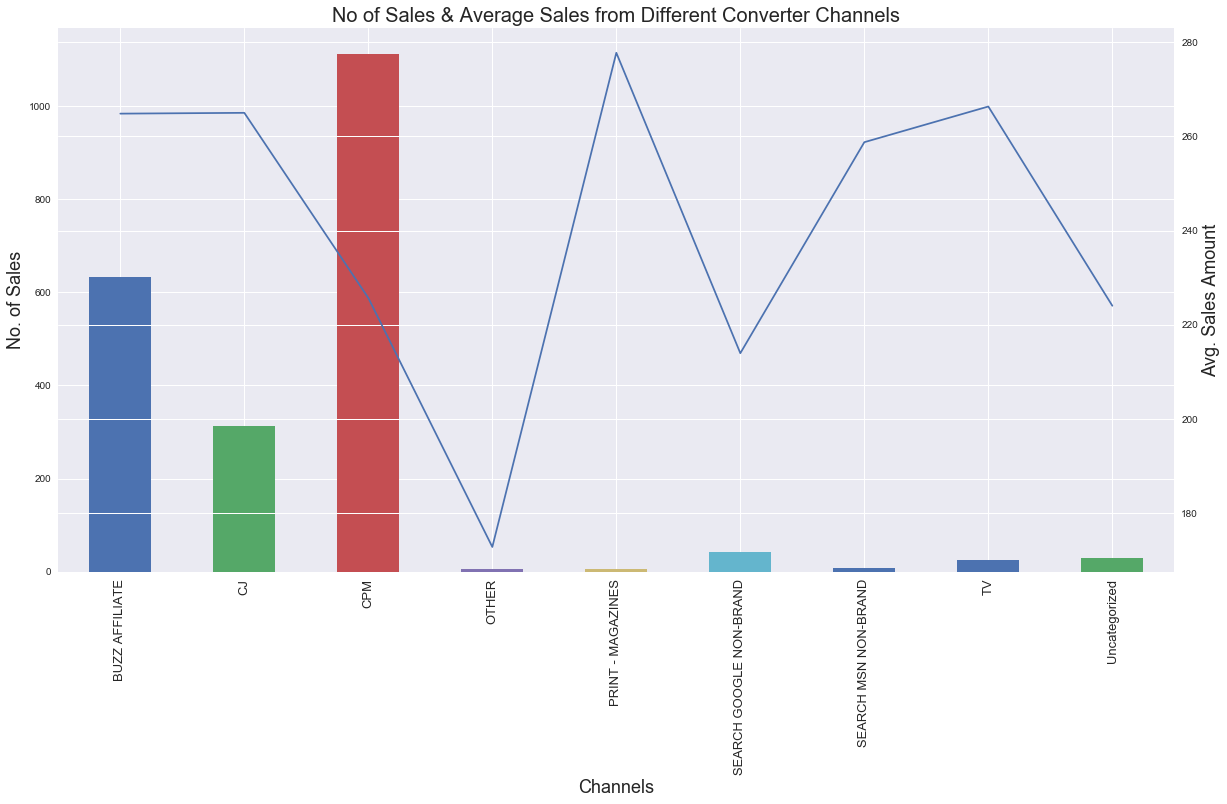

In [27]:
fig = plt.figure()

ax = df4['No_of_Sale'].plot(kind = "bar", use_index = True) 
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df4['Avg_Sales'].values)

ax.set_xlabel('Channels',  fontsize = 18)
ax.set_ylabel('No. of Sales',  fontsize = 18)
ax2.set_ylabel('Avg. Sales Amount', fontsize = 18)
ax.set_title('No of Sales & Average Sales from Different Converter Channels', fontsize = 20)

plt.show()

### Clustering --- Convertor Transaction

In [28]:
web_convert.columns.values

array(['Orderid', 'Orderdatetime', 'Saleamount', 'Newcustomer',
       'Position', 'Positiondatetime', 'Groupname', 'Networkname',
       'Networkid', 'Brand', 'Positionname', 'Orderdatetime.1',
       'Positiontime', 'Time to Convert (Days)', 'Countnumber'],
      dtype=object)

In [29]:
clus_col = ['Saleamount','Newcustomer','Position', 'Groupname','Time to Convert (Days)']
clus_df = web_convert[clus_col]
clus_df.head()

,Saleamount,Newcustomer,Position,Groupname,Time to Convert (Days)
0,341.50,Y,1,BUZZ AFFILIATE,0
2,339.00,Y,2,PRINT - MAGAZINES,2
5,101.79,N,7,CPM,2
13,174.69,N,1,CPM,0
15,277.50,N,7,CPM,67


In [30]:
clus_df2 = pd.get_dummies(clus_df, prefix=['new_customer', 'group_name'])
clus_df2.head()

,Saleamount,Position,Time to Convert (Days),new_customer_N,new_customer_Y,group_name_BUZZ AFFILIATE,group_name_CJ,group_name_CPM,group_name_OTHER,group_name_PRINT - MAGAZINES,group_name_SEARCH GOOGLE NON-BRAND,group_name_SEARCH MSN NON-BRAND,group_name_TV,group_name_Uncategorized
0,341.50,1,0,0,1,1,0,0,0,0,0,0,0,0
2,339.00,2,2,0,1,0,0,0,0,1,0,0,0,0
5,101.79,7,2,1,0,0,0,1,0,0,0,0,0,0
13,174.69,1,0,1,0,0,0,1,0,0,0,0,0,0
15,277.50,7,67,1,0,0,0,1,0,0,0,0,0,0


In [31]:
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster
from sklearn.decomposition import PCA

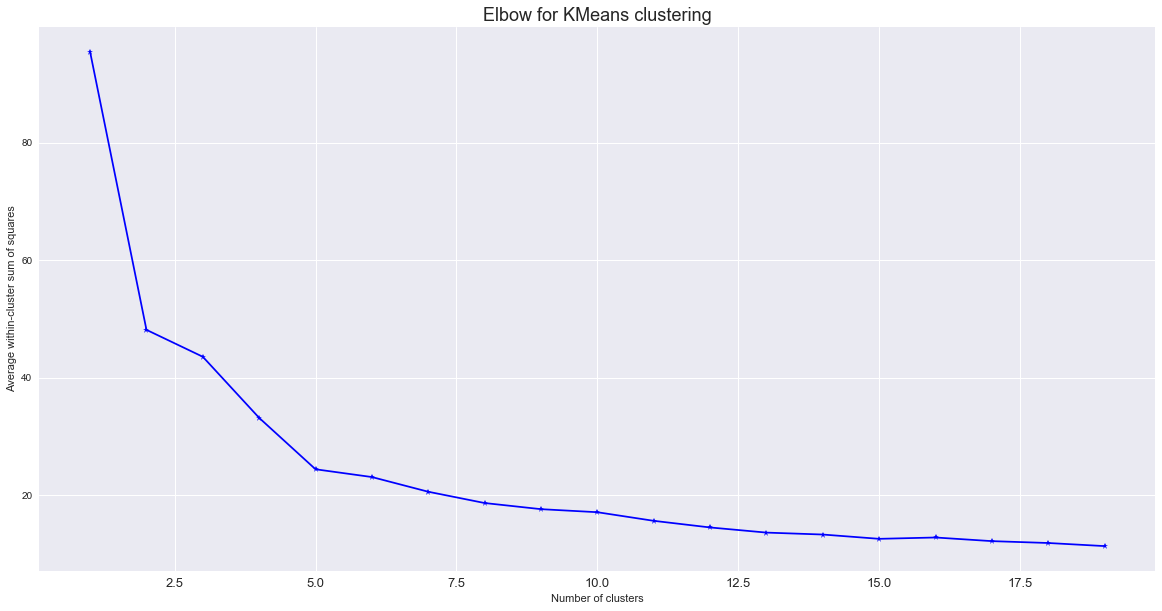

In [32]:
wdata = clus_df2
K = range(1,20)
KM = (sk_cluster.KMeans(n_clusters=k).fit(wdata) for k in K)
centroids = (k.cluster_centers_ for k in KM)

D_k = (sci_distance.cdist(wdata, cent, 'euclidean') for cent in centroids)
dist = (np.min(D, axis=1) for D in D_k)
avgWithinSS = [sum(d) / wdata.shape[0] for d in dist]
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering', fontsize = 18)
plt.show()

In [33]:
n_clusters = 4

means_cluster = sk_cluster.KMeans(n_clusters=n_clusters, random_state = 1111)
columns = clus_df2.columns.values
est = means_cluster.fit(clus_df2[columns])
clusters = est.labels_
clus_df2['cluster'] = clusters

for c in range(n_clusters):
    cluster_members = clus_df2[clus_df2['cluster'] == c][:]
    print('Cluster{}(n={}):'.format(c, len(cluster_members)))
    print('-'*17)

print(clus_df2.groupby(['cluster']).mean())

Cluster0(n=1049):
-----------------
Cluster1(n=677):
-----------------
Cluster2(n=38):
-----------------
Cluster3(n=406):
-----------------
         Saleamount  Position  Time to Convert (Days)  new_customer_N  \
cluster                                                                 
0        323.499514  3.426120                2.917064        0.266921   
1        184.299675  3.844904                4.945347        0.460857   
2        703.077368  4.026316                4.868421        0.368421   
3         90.097094  3.943350                6.480296        0.660099   

         new_customer_Y  group_name_BUZZ AFFILIATE  group_name_CJ  \
cluster                                                             
0              0.733079                   0.340324       0.182078   
1              0.539143                   0.282127       0.138848   
2              0.631579                   0.394737       0.131579   
3              0.339901                   0.169951       0.054187   

      

In [34]:
n_clusters = 5

means_cluster = sk_cluster.KMeans(n_clusters=n_clusters, random_state = 1111)
columns = clus_df2.columns.values
est = means_cluster.fit(clus_df2[columns])
clusters = est.labels_
clus_df2['cluster'] = clusters

for c in range(n_clusters):
    cluster_members = clus_df2[clus_df2['cluster'] == c][:]
    print('Cluster{}(n={}):'.format(c, len(cluster_members)))
    print('-'*17)

print(clus_df2.groupby(['cluster']).mean())

Cluster0(n=688):
-----------------
Cluster1(n=603):
-----------------
Cluster2(n=38):
-----------------
Cluster3(n=394):
-----------------
Cluster4(n=447):
-----------------
         Saleamount  Position  Time to Convert (Days)  new_customer_N  \
cluster                                                                 
0        349.014491  3.290698                2.821221        0.200581   
1        175.367794  3.829187                4.850746        0.472637   
2        703.077368  4.026316                4.868421        0.368421   
3         88.737208  3.956853                6.535533        0.657360   
4        268.165727  3.727069                3.574944        0.398210   

         new_customer_Y  group_name_BUZZ AFFILIATE  group_name_CJ  \
cluster                                                             
0              0.799419                   0.318314       0.167151   
1              0.527363                   0.288557       0.132670   
2              0.631579               

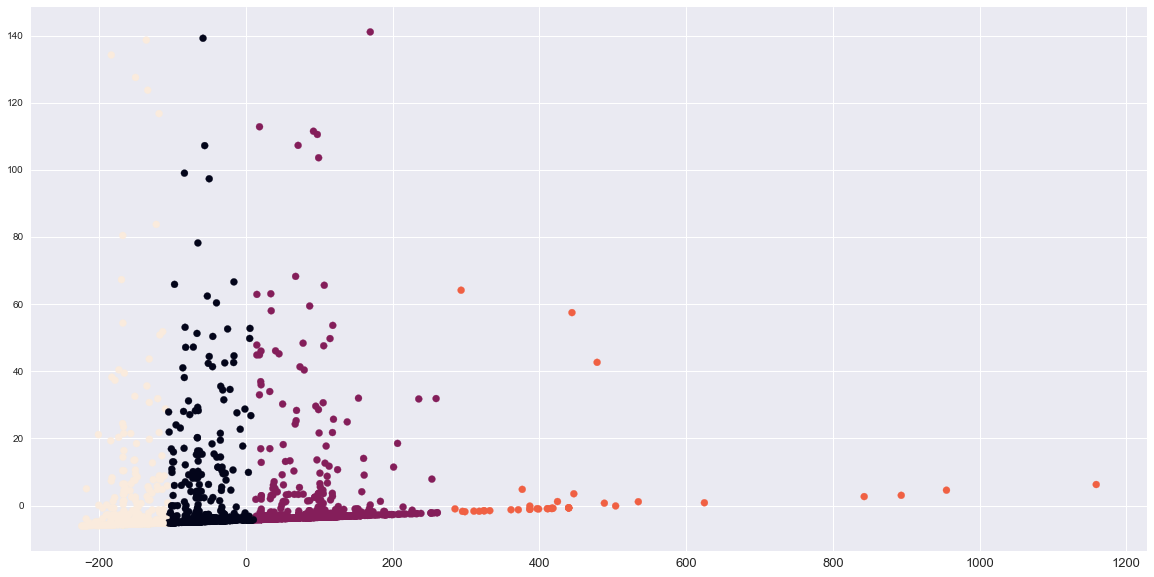

In [35]:
pca = PCA(n_components=2).fit(clus_df2)
pca_2d = pca.transform(clus_df2)
kmeans = sk_cluster.KMeans(n_clusters=4, random_state=111)
kmeans.fit(clus_df2)
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

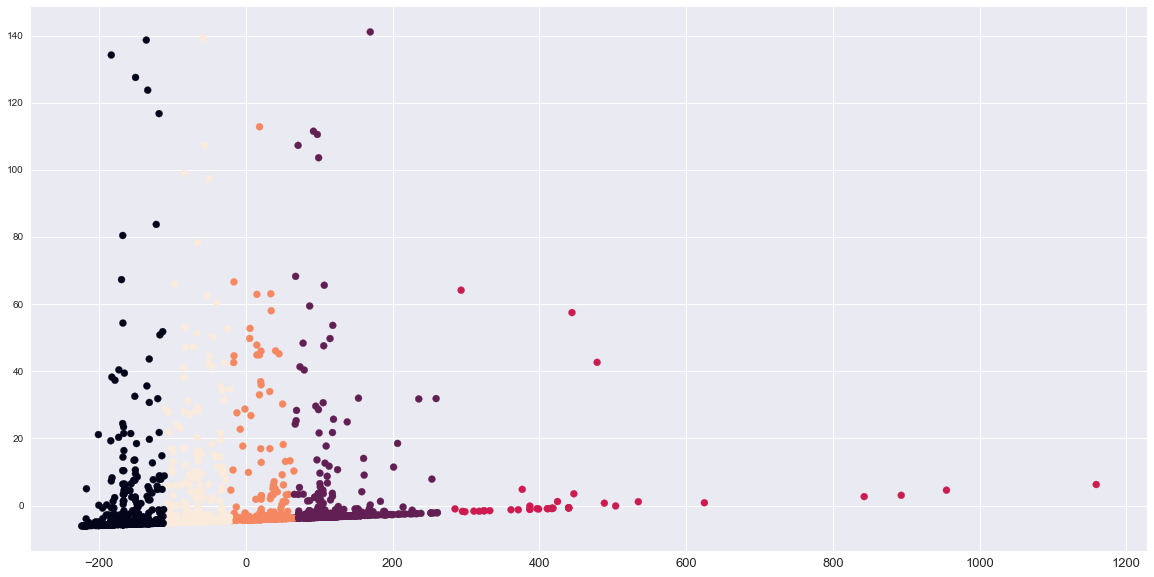

In [36]:
pca = PCA(n_components=2).fit(clus_df2)
pca_2d = pca.transform(clus_df2)
kmeans = sk_cluster.KMeans(n_clusters=5, random_state=111)
kmeans.fit(clus_df2)
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

### Clustering --- Originator Transaction

In [37]:
web_origin.columns.values

array(['Orderid', 'Orderdatetime', 'Saleamount', 'Newcustomer',
       'Position', 'Positiondatetime', 'Groupname', 'Networkname',
       'Networkid', 'Brand', 'Positionname', 'Orderdatetime.1',
       'Positiontime', 'Time to Convert (Days)', 'Countnumber'],
      dtype=object)

In [38]:
clus_col = ['Saleamount','Newcustomer','Groupname','Brand','Time to Convert (Days)']
clus_dfo = web_origin[clus_col]
clus_dfo.head()

,Saleamount,Newcustomer,Groupname,Brand,Time to Convert (Days)
1,341.50,Y,SEARCH GOOGLE BRAND,Y,0
4,339.00,Y,PRINT - MAGAZINES,N,8
12,101.79,N,CPM,N,3
14,174.69,N,CPM,N,1
22,277.50,N,SEARCH MSN BRAND,Y,170


In [39]:
clus_df3 = pd.get_dummies(clus_dfo, prefix=['new_customer', 'group_name','brand'])
clus_df3.head()

,Saleamount,Time to Convert (Days),new_customer_N,new_customer_Y,group_name_BUZZ AFFILIATE,group_name_CJ,group_name_CPM,group_name_DIRECT MAIL,group_name_OTHER,group_name_PRINT - MAGAZINES,group_name_SEARCH GOOGLE BRAND,group_name_SEARCH GOOGLE NON-BRAND,group_name_SEARCH MSN BRAND,group_name_SEARCH MSN NON-BRAND,group_name_SEARCH YAHOO BRAND,group_name_Social,group_name_TV,group_name_Uncategorized,brand_N,brand_Y
1,341.50,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,339.00,8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
12,101.79,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
14,174.69,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
22,277.50,170,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


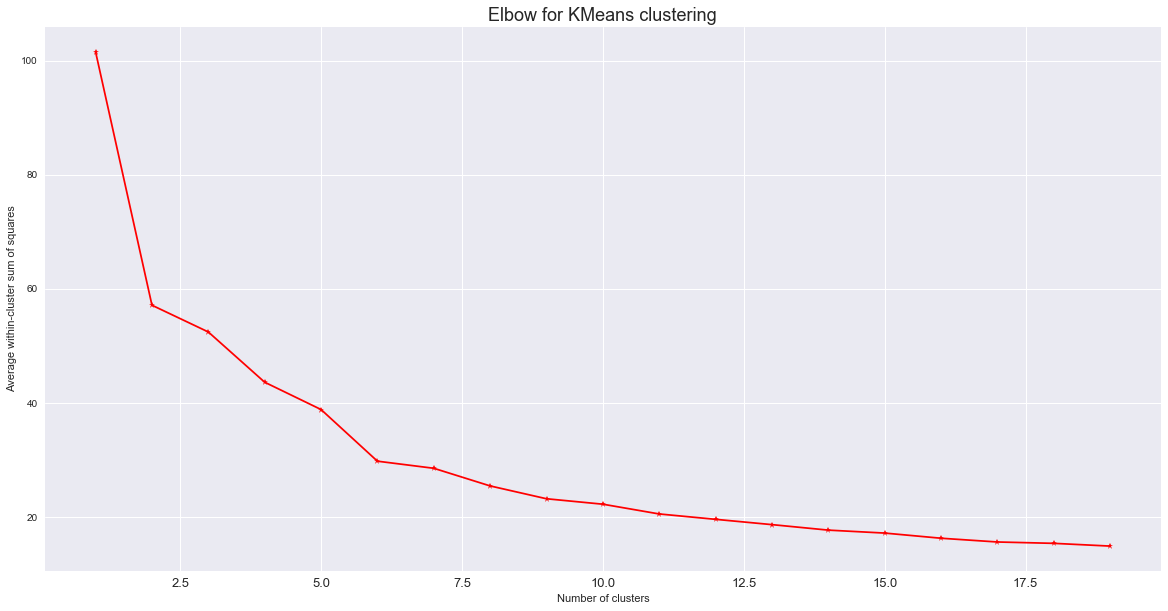

In [40]:
wdata = clus_df3
K = range(1,20)
KM = (sk_cluster.KMeans(n_clusters=k).fit(wdata) for k in K)
centroids = (k.cluster_centers_ for k in KM)

D_k = (sci_distance.cdist(wdata, cent, 'euclidean') for cent in centroids)
dist = (np.min(D, axis=1) for D in D_k)
avgWithinSS = [sum(d) / wdata.shape[0] for d in dist]
plt.plot(K, avgWithinSS, 'r*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering', fontsize = 18)
plt.show()

In [41]:
n_clusters = 4

means_cluster = sk_cluster.KMeans(n_clusters=n_clusters, random_state = 1111)
columns = clus_df3.columns.values
est = means_cluster.fit(clus_df3[columns])
clusters = est.labels_
clus_df3['cluster'] = clusters

for c in range(n_clusters):
    cluster_members = clus_df3[clus_df3['cluster'] == c][:]
    print('Cluster{}(n={}):'.format(c, len(cluster_members)))
    print('-'*17)

print(clus_df3.groupby(['cluster']).mean())

Cluster0(n=1047):
-----------------
Cluster1(n=412):
-----------------
Cluster2(n=672):
-----------------
Cluster3(n=38):
-----------------
         Saleamount  Time to Convert (Days)  new_customer_N  new_customer_Y  \
cluster                                                                       
0        323.627746               12.014327        0.267431        0.732569   
1         90.951675               21.747573        0.665049        0.334951   
2        184.976652               17.558036        0.453869        0.546131   
3        703.077368                9.263158        0.368421        0.631579   

         group_name_BUZZ AFFILIATE  group_name_CJ  group_name_CPM  \
cluster                                                             
0                         0.153773       0.047755        0.346705   
1                         0.080097       0.024272        0.441748   
2                         0.133929       0.066964        0.373512   
3                         0.078947      

In [42]:
n_clusters = 5

means_cluster = sk_cluster.KMeans(n_clusters=n_clusters, random_state = 1111)
columns = clus_df3.columns.values
est = means_cluster.fit(clus_df3[columns])
clusters = est.labels_
clus_df3['cluster'] = clusters

for c in range(n_clusters):
    cluster_members = clus_df3[clus_df3['cluster'] == c][:]
    print('Cluster{}(n={}):'.format(c, len(cluster_members)))
    print('-'*17)

print(clus_df3.groupby(['cluster']).mean())

Cluster0(n=682):
-----------------
Cluster1(n=828):
-----------------
Cluster2(n=37):
-----------------
Cluster3(n=134):
-----------------
Cluster4(n=488):
-----------------
         Saleamount  Time to Convert (Days)  new_customer_N  new_customer_Y  \
cluster                                                                       
0        349.178416                8.362170        0.192082        0.807918   
1        133.342077                7.479469        0.521739        0.478261   
2        707.809189                9.486486        0.378378        0.621622   
3        198.358358              139.216418        0.776119        0.223881   
4        258.228914                5.713115        0.393443        0.606557   

         group_name_BUZZ AFFILIATE  group_name_CJ  group_name_CPM  \
cluster                                                             
0                         0.121701       0.049853        0.363636   
1                         0.107488       0.041063        0.437198

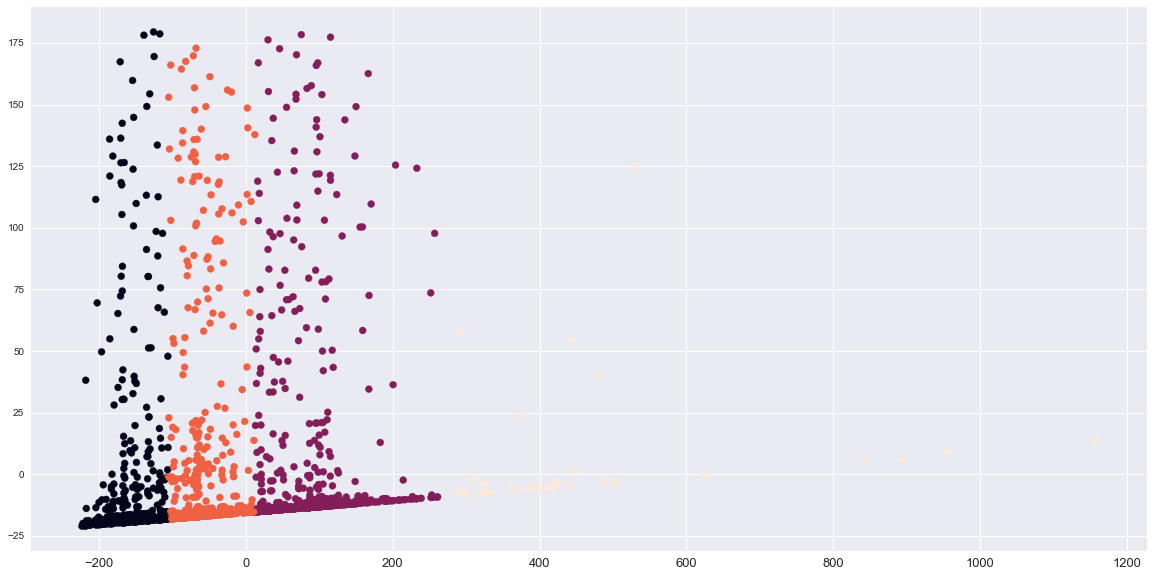

In [43]:
pca = PCA(n_components=2).fit(clus_df3)
pca_2d = pca.transform(clus_df3)
kmeans = sk_cluster.KMeans(n_clusters=4, random_state=111)
kmeans.fit(clus_df3)
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

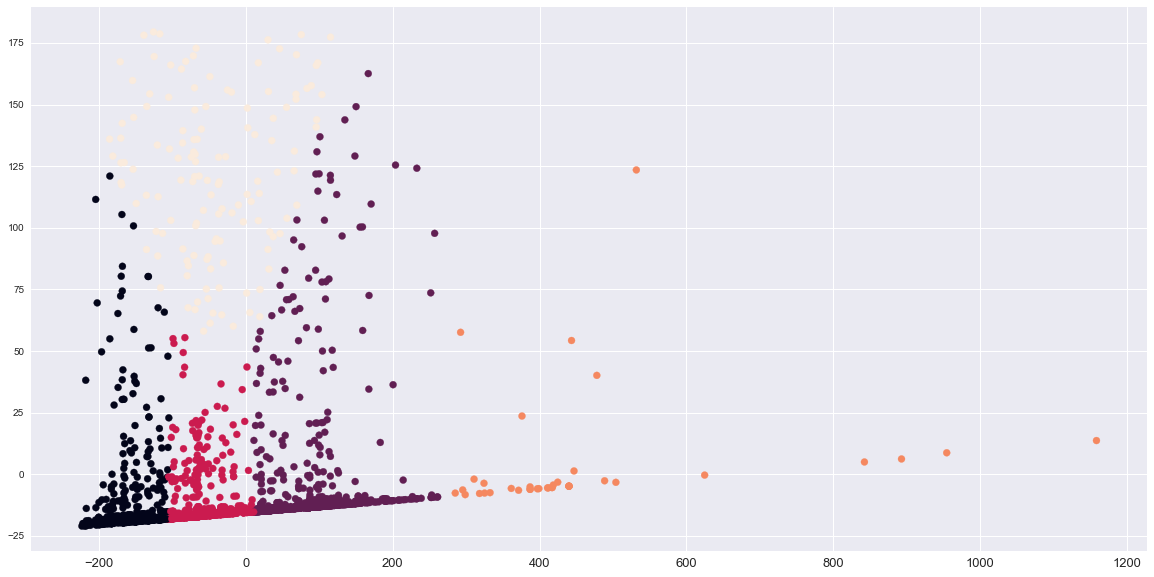

In [44]:
pca = PCA(n_components=2).fit(clus_df3)
pca_2d = pca.transform(clus_df3)
kmeans = sk_cluster.KMeans(n_clusters=5, random_state=111)
kmeans.fit(clus_df3)
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()